In [1]:
from data_loader import *
import numpy as np
import h5py
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
whole_data = []

# loop from 0 to the number of .hdf5 files you want to load
nb_files = 4180

for i in range(0,nb_files):
    # Selects the file
    file_to_load = 'h5/n2data_extended_ballroom_' + str(i) + '.hdf5'
    
    # Gets data
    data = data_loader(file_to_load)
    whole_data.append(data)
    if i%1000 == 0:
            print(f"We've already made {i} importation.")

    
print(len(whole_data))

We've already made 0 importation.
We've already made 1000 importation.
We've already made 2000 importation.
We've already made 3000 importation.
We've already made 4000 importation.
4180


In [3]:
# LIST -> Dictionary(Data) -> Features(numpy.ndarray)
# m -> the m-th example
# feature -> ODF_SET, PeDF_FULL_SET, PeDF_PARTIAL_SET, coeffs
# wavelet_level -> wavelet level
# whole_data[m][feature][wavelet_level]

print(type(whole_data[0]['ODF_SET'][0]))

print(f"O database possui {len(whole_data)} exemplos de treinamento.")
print(f"O nível Wavelet A2 tem {len(whole_data[0]['PeDF_PARTIAL_SET'][0])} amostras.")
print(f"O nível Wavelet D2 tem {len(whole_data[0]['PeDF_PARTIAL_SET'][1])} amostras.")
print(f"O nível Wavelet D1 tem {len(whole_data[0]['PeDF_PARTIAL_SET'][2])} amostras.")

print(whole_data[0]['bpm'])

<class 'numpy.ndarray'>
O database possui 4180 exemplos de treinamento.
O nível Wavelet A2 tem 149 amostras.
O nível Wavelet D2 tem 149 amostras.
O nível Wavelet D1 tem 298 amostras.
87


In [4]:
# CRIANDO VETOR PRÓPRIO Y
y = []
for j in range(0,len(whole_data)): 
    y.append(whole_data[j]['bpm'])
    
print(f"O valor máximo de andamento é {np.max(y)}.")
print(f"O valor mínimo de andamento é {np.min(y)}.")
#print(y)
y = np.array(y).reshape(len(whole_data),1)
print(type(y))


O valor máximo de andamento é 216.
O valor mínimo de andamento é 65.
<class 'numpy.ndarray'>


In [5]:
aux2 = y.tolist()
print("-")
def remove_repetidos(lista):
    l = []
    laux = []
    a=0
    for i in lista:
        a=a+1
        if i not in l:
            l.append(i)
            laux.append(a)
    l.sort()
    return l, laux

classes_sort, posicao = remove_repetidos(aux2)

print(classes_sort)
aux2=sorted(aux2)
print("-")
rcr = []
recorrencia = []
laux = []
l = []
a=0
for i in aux2:
    rcr.append(aux2.count(i))
    a=a+1
    if i not in l:
        l.append(i)
        laux.append(a)

for i in laux:
    recorrencia.append(rcr[i-1])

print(laux)
print("-")
print(posicao)

print("-")
print(recorrencia)
print(sum(recorrencia))


-
[[65], [66], [68], [72], [74], [76], [78], [80], [81], [82], [83], [84], [85], [86], [87], [88], [90], [92], [93], [94], [95], [96], [98], [100], [102], [104], [106], [107], [108], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [122], [123], [124], [125], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [138], [140], [142], [144], [148], [151], [152], [153], [156], [157], [160], [164], [168], [171], [172], [174], [175], [176], [177], [180], [184], [186], [188], [192], [196], [200], [202], [204], [208], [212], [216]]
-
[1, 2, 3, 5, 6, 8, 16, 17, 29, 31, 33, 35, 240, 245, 246, 631, 660, 669, 734, 735, 737, 738, 858, 876, 1349, 1518, 1565, 1567, 1568, 1586, 1587, 1590, 1741, 1742, 1746, 1748, 2119, 2123, 2151, 2153, 2240, 2243, 2244, 2696, 2700, 2703, 3024, 3027, 3030, 3031, 3048, 3050, 3052, 3053, 3062, 3063, 3067, 3070, 3077, 3081, 3082, 3092, 3093, 3097, 3098, 3112, 3126, 3181, 3192, 3389, 3470, 3482, 3495, 3627, 3666, 3670, 3671, 36

In [6]:
np.array(y).reshape(len(whole_data),1)
onehotencoder = OneHotEncoder()
Y = onehotencoder.fit_transform(y).toarray()
print(Y.shape)
print(Y[1])

(4180, 85)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1.0
(17, 18, 3)


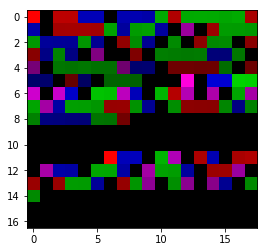

In [7]:
print(whole_data[0]['PeDF_PARTIAL_SET'][2][0])
lista = []

for j in range(0,len(whole_data)):  #varrer m-exemplos

    listaux0 = []    #D1
    listaux1 = []    #D2
    listaux2 = []    #A2
    listaux0.append(1)
    listaux1.append(1)    
    listaux2.append(1)  
    for i in range(1,len(whole_data[0]['PeDF_PARTIAL_SET'][2])):
        if (i<len(whole_data[j]['PeDF_PARTIAL_SET'][2])-1):
            if (whole_data[j]['PeDF_PARTIAL_SET'][2][i]>whole_data[j]['PeDF_PARTIAL_SET'][2][i-1] and whole_data[j]['PeDF_PARTIAL_SET'][2][i]>whole_data[j]['PeDF_PARTIAL_SET'][2][i+1]):
                listaux0.append(whole_data[j]['PeDF_PARTIAL_SET'][2][i])
            else:
                listaux0.append(0)
        else: 
            listaux0.append(0)

    for i in range(1,len(whole_data[0]['PeDF_PARTIAL_SET'][1])):
        if (i<len(whole_data[0]['PeDF_PARTIAL_SET'][1])-1):
            if (whole_data[j]['PeDF_PARTIAL_SET'][1][i]>whole_data[j]['PeDF_PARTIAL_SET'][1][i-1] and whole_data[j]['PeDF_PARTIAL_SET'][1][i]>whole_data[j]['PeDF_PARTIAL_SET'][1][i+1]):
                listaux1.append(whole_data[j]['PeDF_PARTIAL_SET'][1][i])
            else:
                listaux1.append(0)
        else: 
            listaux1.append(0)
        if (i<len(whole_data[0]['PeDF_PARTIAL_SET'][0])-1):
            if (whole_data[j]['PeDF_PARTIAL_SET'][0][i]>whole_data[j]['PeDF_PARTIAL_SET'][0][i-1] and whole_data[j]['PeDF_PARTIAL_SET'][0][i]>whole_data[j]['PeDF_PARTIAL_SET'][0][i+1]):
                listaux2.append(whole_data[j]['PeDF_PARTIAL_SET'][2][i])
            else:
                listaux2.append(0)
        else: 
            listaux2.append(0)
            
#Setar shape 298, 149, 149 17x18 = 306 
    for i in range(0,8):
        listaux0.append(0)
    for i in range(0,8+149):
        listaux1.append(0)
        listaux2.append(0)

#
    lista.append([listaux0, listaux1, listaux2]) #len = 3*306*4180 - 3837240 dados
#print(lista[2])
#lista = np.array(lista).reshape(len(whole_data),3,17,18) #(4180,3,17,18)
lista = np.array(lista).reshape(len(whole_data),17,18,3) #(4180,3,17,18)


# exemplos --> nível wavelet --> imagem (17x18)
listaux0 = np.array(listaux0).reshape(17,18)
listaux1 = np.array(listaux1).reshape(17,18)
listaux2 = np.array(listaux2).reshape(17,18)

print(lista[1].shape)
#imagem

imgplot = plt.imshow(lista[2])


Text(0.5,1,'A2')

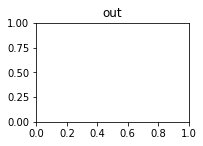

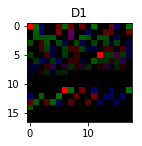

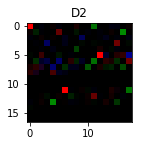

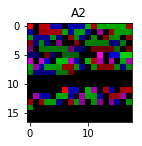

In [8]:
fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
#k = np.concatenate((lista[0][1],lista[0][2],lista[0][0]),axis=1)
#print(k.shape)
#imgplot = plt.imshow(k)
a.set_title('out')
fig = plt.figure()
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(lista[0])
a.set_title('D1')
fig = plt.figure()
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(lista[1])
a.set_title('D2')
fig = plt.figure()
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(lista[2])
a.set_title('A2')

In [9]:
#from sklearn.cross_validation import train_test_split
#X_train, X_val, Y_train, Y_val = train_test_split(lista,Y,test_size=0.08,random_state=0)
#print('Lista Size',lista.shape)
#print('Y Size', Y.shape)
#print('X_train Size',X_train.shape)
#print('X_val Size',X_val.shape)
#print('Y_train Size',Y_train.shape)
#print('Y_val Size',Y_val.shape)

np.random.seed(0)
np.random.shuffle(lista)
np.random.seed(0)
np.random.shuffle(Y)

total_size = lista.shape[0]
test_size = 100
train_size = int((total_size - test_size)*0.92)
val_size = (train_size)

X_test = lista[0:test_size,:,:,:]
Y_test = Y[0:test_size,:]

X_train = lista[test_size:train_size,:,:,:]
Y_train = Y[test_size:train_size,:]
X_val = lista[val_size:total_size,:,:,:]
Y_val = Y[val_size:total_size,:]

print('Lista Size',lista.shape)
print('Y Size', Y.shape)
print('X_train Size',X_train.shape)
print('Y_train Size',Y_train.shape)
print('X_val Size',X_val.shape)
print('Y_val Size',Y_val.shape)
print('X_test Size',X_test.shape)
print('Y_test Size',Y_test.shape)

Lista Size (4180, 17, 18, 3)
Y Size (4180, 85)
X_train Size (3653, 17, 18, 3)
Y_train Size (3653, 85)
X_val Size (427, 17, 18, 3)
Y_val Size (427, 85)
X_test Size (100, 17, 18, 3)
Y_test Size (100, 85)


In [10]:
hf = h5py.File('h5/Data_extended_ballroom.hdf5','a')

Xtrain = hf.create_group('Xtrain')
Ytrain = hf.create_group('Ytrain')
Xval = hf.create_group('Xval')
Yval = hf.create_group('Yval')
Xtest = hf.create_group('Xtest')
Ytest = hf.create_group('Ytest')
Classessort = hf.create_group('Classessort')
Rcr = hf.create_group('Rcr')


Xtrain.create_dataset("Xtrain", data=X_train)
Ytrain.create_dataset("Ytrain", data=Y_train)
Xval.create_dataset("Xval", data=X_val)
Yval.create_dataset("Yval", data=Y_val)
Xtest.create_dataset("Xtest", data=X_test)
Ytest.create_dataset("Ytest", data=Y_test)
Classessort.create_dataset("Classessort", data=classes_sort)
Rcr.create_dataset("Rcr", data=recorrencia)

hf.close()
